4423680/4422102 [==============================] - 0s 0us/step
type y_train <class 'numpy.ndarray'>
Epoch 1/8
1100/1100 [==============================] - 5s 5ms/step - loss: 0.4422 - accuracy: 0.8420 - val_loss: 0.3059 - val_accuracy: 0.8920
Epoch 2/8
1100/1100 [==============================] - 5s 5ms/step - loss: 0.3049 - accuracy: 0.8905 - val_loss: 0.2717 - val_accuracy: 0.8988
Epoch 3/8
1100/1100 [==============================] - 5s 5ms/step - loss: 0.2695 - accuracy: 0.9002 - val_loss: 0.2618 - val_accuracy: 0.9036
Epoch 4/8
1100/1100 [==============================] - 5s 5ms/step - loss: 0.2418 - accuracy: 0.9099 - val_loss: 0.2460 - val_accuracy: 0.9110
Epoch 5/8
1100/1100 [==============================] - 5s 5ms/step - loss: 0.2231 - accuracy: 0.9164 - val_loss: 0.2496 - val_accuracy: 0.9062
Epoch 6/8
1100/1100 [==============================] - 5s 5ms/step - loss: 0.2051 - accuracy: 0.9230 - val_loss: 0.2404 - val_accuracy: 0.9132
Epoch 7/8
1100/1100 [=====================

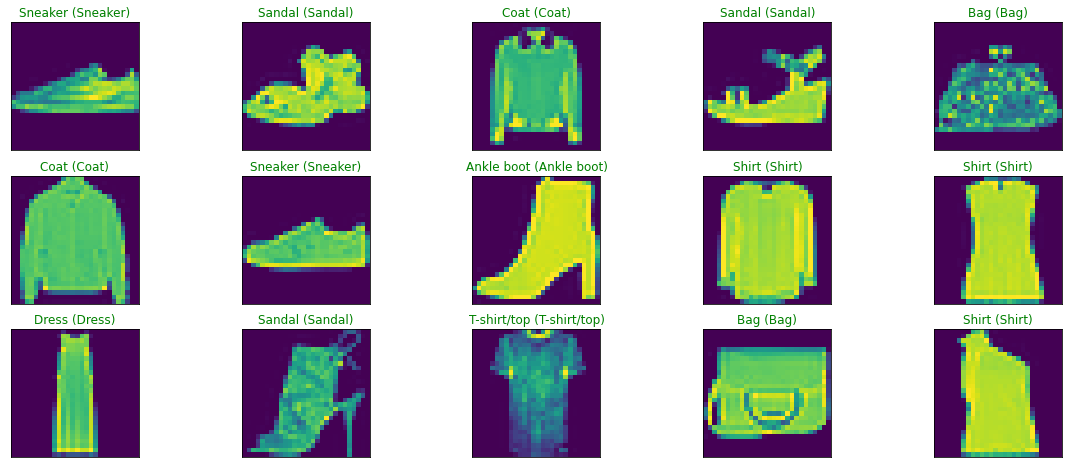

In [ ]:

import pandas as pd
import numpy as np 
from keras.datasets import fashion_mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras import utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Set that the color channel value will be first 
K.set_image_data_format("channels_first")

# Set seed 
np.random.seed(0)


# Load data and target from MNIST data 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
df=pd.DataFrame(y_train)
df.to_csv("../test.csv")
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], 1, w, h)

x_valid = x_valid.reshape(x_valid.shape[0], 1, w, h)

x_test = x_test.reshape(x_test.shape[0], 1, w, h)

# One-hot encode the labels
print("type y_train",type(y_train))
y_train = utils.to_categorical(y_train, 10)

y_valid = utils.to_categorical(y_valid, 10)
y_test = utils.to_categorical(y_test, 10)

# Start neural network 



 
network = Sequential()
network.add(Conv2D(filters=64,kernel_size=(2, 2),input_shape=(1, w, h),activation='relu'))
# Add max pooling layer with a 2x2 window 
network.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer 
network.add(Dropout(0.3))

# Add layer to flatten input 
network.add(Flatten())
# # Add fully connected layer of 128 units with a ReLU activation function 
network.add(Dense(256, activation="relu"))
# Add dropout layer 
network.add(Dropout(0.3))
# Add fully connected layer with a softmax activation function 
network.add(Dense(10, activation="softmax"))
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))
plot_model(network, show_shapes=True, to_file="network.png")
# Compile neural network
network.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"]) 
# Train neural network 
network.fit(x_train,y_train,batch_size=50,epochs=8,validation_data=(x_valid, y_valid))

# Evaluate the model on test set
score = network.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = network.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))